In [1]:
import torch
import numpy as np

torch.manual_seed(0)
np.random.seed(0)

In [2]:
# Import libraries
import os
import xlrd
import math
import zipfile
import numbers
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from pathlib import Path
import time
from ctgan import CTGANSynthesizer
from sklearn.model_selection import train_test_split

In [3]:
num_epochs = 300

In [4]:
home = str(Path.home())

In [5]:
home

'C:\\Users\\stazt'

In [6]:
# Load cleaned 2016-2018 OVS datasets; replace NAs by -1
OVS1618 = pd.read_csv(home + '/Documents/nBox/Project Ultron/Milestone 3/Dataset/Cleaned (Outliers Removed)/Reduced to Benchmarks-1.csv')

In [7]:
OVS1618.head()

,Expenditure on Accommodation (c4.tot.new),Expenditure on Accommodation (c4.tot.new)_cat,Expenditure on F&B (c6.tot.new),Expenditure on F&B (c6.tot.new)_cat,"Expenditure on Hawker Centre, Food Court or Coffee Shop (c6c_1.r)","Expenditure on Hawker Centre, Food Court or Coffee Shop (c6c_1.r)_cat",Expenditure on Casual Dining (c6c_2.r),Expenditure on Casual Dining (c6c_2.r)_cat,Expenditure on Transport (c7.tot.new),Expenditure on Transport (c7.tot.new)_cat,...,Mode of Transport (m1),Main POV - Leisure/Holiday (b13a_112),Main POV - Visiting Friends/Family (b13a_114),Main POV - Business (b13a_116),Main POV - Healthcare (b113_117),Main POV - Education/Training/Workshop (b13a_118),Main POV - Others (b13a_119),Travel Package (c1a),"Accommodation - Hotels (c4a_1, c4a_2, c4a_3)","Accommodation - Others (c4a_4, c4a_5, c4a_7, c4a_8)"
0,679.04,0,400.0,0,-1.0,1,400.0,0,50.0,0,...,1,1,0,0,0,0,0,1,1,0
1,-1.00,1,130.0,0,100.0,0,30.0,0,100.0,0,...,1,1,1,0,0,0,0,2,0,0
2,-1.00,1,120.0,0,120.0,0,-1.0,1,40.0,0,...,1,0,0,0,0,0,0,2,0,0
3,-1.00,1,80.0,0,-1.0,1,80.0,0,100.0,0,...,1,1,1,0,0,0,0,2,0,0
4,130.00,0,60.0,0,60.0,0,-1.0,1,40.0,0,...,1,1,0,0,0,0,0,2,0,1


In [8]:
log_OVS1618 = np.log(OVS1618+2)

In [9]:
log_OVS1618.head()

,Expenditure on Accommodation (c4.tot.new),Expenditure on Accommodation (c4.tot.new)_cat,Expenditure on F&B (c6.tot.new),Expenditure on F&B (c6.tot.new)_cat,"Expenditure on Hawker Centre, Food Court or Coffee Shop (c6c_1.r)","Expenditure on Hawker Centre, Food Court or Coffee Shop (c6c_1.r)_cat",Expenditure on Casual Dining (c6c_2.r),Expenditure on Casual Dining (c6c_2.r)_cat,Expenditure on Transport (c7.tot.new),Expenditure on Transport (c7.tot.new)_cat,...,Mode of Transport (m1),Main POV - Leisure/Holiday (b13a_112),Main POV - Visiting Friends/Family (b13a_114),Main POV - Business (b13a_116),Main POV - Healthcare (b113_117),Main POV - Education/Training/Workshop (b13a_118),Main POV - Others (b13a_119),Travel Package (c1a),"Accommodation - Hotels (c4a_1, c4a_2, c4a_3)","Accommodation - Others (c4a_4, c4a_5, c4a_7, c4a_8)"
0,6.523621,0.693147,5.996452,0.693147,0.000000,1.098612,5.996452,0.693147,3.951244,0.693147,...,1.098612,1.098612,0.693147,0.693147,0.693147,0.693147,0.693147,1.098612,1.098612,0.693147
1,0.000000,1.098612,4.882802,0.693147,4.624973,0.693147,3.465736,0.693147,4.624973,0.693147,...,1.098612,1.098612,1.098612,0.693147,0.693147,0.693147,0.693147,1.386294,0.693147,0.693147
2,0.000000,1.098612,4.804021,0.693147,4.804021,0.693147,0.000000,1.098612,3.737670,0.693147,...,1.098612,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,1.386294,0.693147,0.693147
3,0.000000,1.098612,4.406719,0.693147,0.000000,1.098612,4.406719,0.693147,4.624973,0.693147,...,1.098612,1.098612,1.098612,0.693147,0.693147,0.693147,0.693147,1.386294,0.693147,0.693147
4,4.882802,0.693147,4.127134,0.693147,4.127134,0.693147,0.000000,1.098612,3.737670,0.693147,...,1.098612,1.098612,0.693147,0.693147,0.693147,0.693147,0.693147,1.386294,0.693147,1.098612


In [10]:
# List of 14 expenditure variables
list_expnd = ['Expenditure on Accommodation (c4.tot.new)',
              'Expenditure on F&B (c6.tot.new)',
              'Expenditure on Hawker Centre, Food Court or Coffee Shop (c6c_1.r)',
              'Expenditure on Casual Dining (c6c_2.r)',
              'Expenditure on Transport (c7.tot.new)', 
              'Expenditure on Sightseeing & Entertainment (c10.tot.new)',
              'Expenditure on Sightseeing (c10c_1.r)',
              'Expenditure on Attractions (c10c_2.r)',
              'Expenditure on Shopping (t7.m.any)',          
              'Expenditure on Healthcare & Wellness Products (t7.m.well)',
              'Expenditure on Confectionery & Food Items (t7.m.food)',
              'Expenditure on Fashion (t7.m.fash)',
              'Expenditure on Other Shopping Items (t7.m.gift + t7.m.oth)',
              'Package Expenditure Per Person (c1b.r)']

# List of 10 categorical variables
list_cat = ['Mode of Transport (m1)',
            'Main POV - Leisure/Holiday (b13a_112)',
            'Main POV - Visiting Friends/Family (b13a_114)',
            'Main POV - Business (b13a_116)',
            'Main POV - Healthcare (b113_117)',
            'Main POV - Education/Training/Workshop (b13a_118)',
            'Main POV - Others (b13a_119)',
            'Travel Package (c1a)',
            'Accommodation - Hotels (c4a_1, c4a_2, c4a_3)',
            'Accommodation - Others (c4a_4, c4a_5, c4a_7, c4a_8)']

In [11]:
with open(home + '/Documents/nBox/Project Ultron/Milestone 3/Dataset/Cleaned (Outliers Removed)/binary_categorical_columns.txt',"r+")   as f:
    new_cat_list = f.read().splitlines() 

In [12]:
new_cat_list

['Expenditure on Accommodation (c4.tot.new)_cat',
 'Expenditure on F&B (c6.tot.new)_cat',
 'Expenditure on Hawker Centre, Food Court or Coffee Shop (c6c_1.r)_cat',
 'Expenditure on Casual Dining (c6c_2.r)_cat',
 'Expenditure on Transport (c7.tot.new)_cat',
 'Expenditure on Sightseeing & Entertainment (c10.tot.new)_cat',
 'Expenditure on Sightseeing (c10c_1.r)_cat',
 'Expenditure on Attractions (c10c_2.r)_cat',
 'Expenditure on Shopping (t7.m.any)_cat',
 'Expenditure on Healthcare & Wellness Products (t7.m.well)_cat',
 'Expenditure on Confectionery & Food Items (t7.m.food)_cat',
 'Expenditure on Fashion (t7.m.fash)_cat',
 'Expenditure on Other Shopping Items (t7.m.gift + t7.m.oth)_cat',
 'Package Expenditure Per Person (c1b.r)_cat']

In [13]:
cat_cols = new_cat_list + list_cat

In [14]:
len(cat_cols)

24

In [23]:
def plots_log(original_data, log_data, list_expnd):
    for col in list_expnd:
        prop = round(sum(original_data[col+'_cat'])/len(original_data[col+'_cat'])*100,2)
        plt.suptitle(col + " " + str(prop) +'% NAs')
              
       # sns.kdeplot(original_data[col],shade=True, label='Original')
        if len(log_data[col].unique()) > 1:
            sns.kdeplot(log_data[col],shade=True, label='Log_transfer')
        plt.legend();
        plt.show()

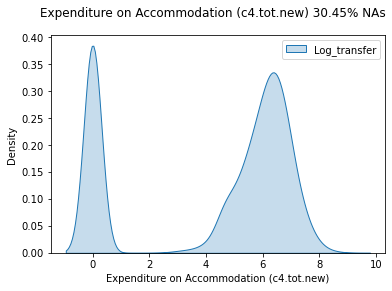

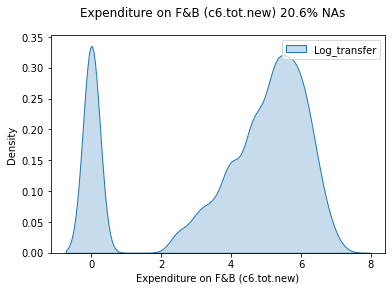

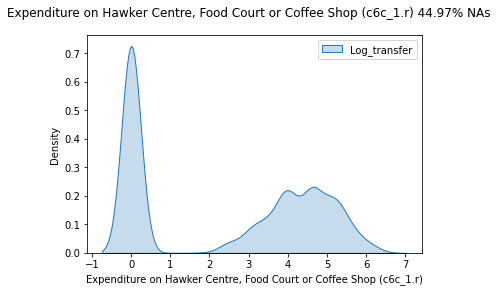

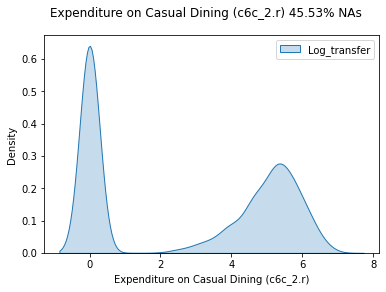

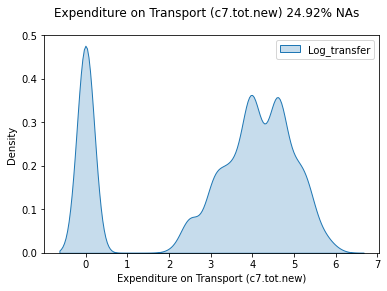

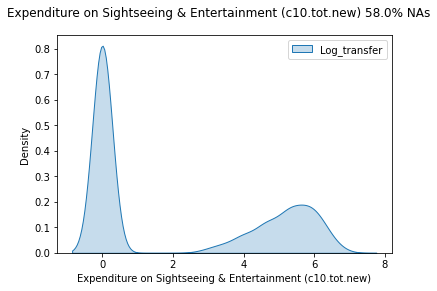

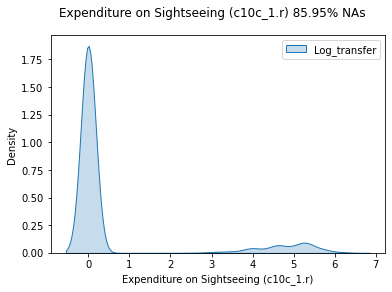

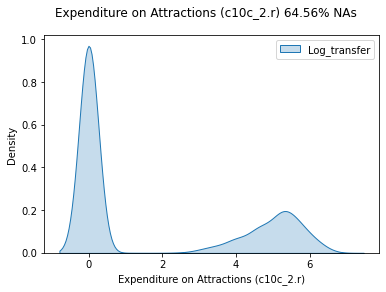

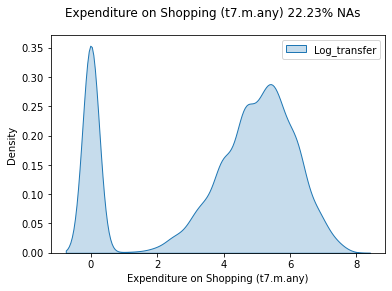

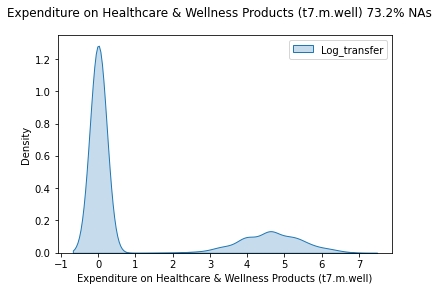

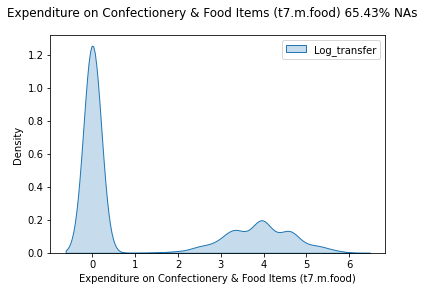

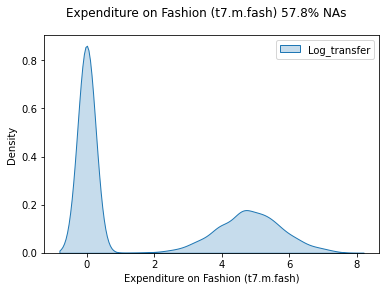

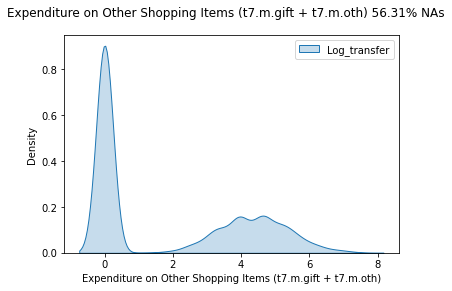

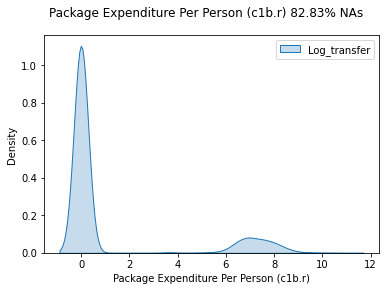

In [24]:
plots_log(OVS1618,log_OVS1618,list_expnd)

In [25]:
## split data into training/validation/test
OVS1618_train_val, OVS1618_test = train_test_split(log_OVS1618, test_size=0.15, random_state=42)

In [26]:
OVS1618_train_val.shape

(56125, 38)

In [27]:
OVS1618_test.shape

(9905, 38)

In [28]:
ctgan = CTGANSynthesizer()
print('Training CTGAN is starting')
start_time = time.time()
ctgan.fit(OVS1618_train_val, discrete_columns=cat_cols, epochs=num_epochs, model_summary=False, trans="VGM",use_cond_gen=True)
elapsed_time = time.time() - start_time

Training CTGAN is starting
Learning rate:  0.0002
Batch size:  500
Number of Epochs:  300
training data shape:  (46247, 38)
validation data shape:  (9878, 38)
num_components 13
num_components 14
num_components 13
num_components 11
num_components 14
num_components 10
num_components 5
num_components 8
num_components 15
num_components 10
num_components 10
num_components 11
num_components 13
num_components 6
transformed data shape:  (46247, 216)
data dimension: 216
Dropout rate:  0.5
Epoch 1, Loss G: 0.7828, Loss D: 0.3660
Epoch 2, Loss G: -0.7448, Loss D: 0.0975
Epoch 3, Loss G: -1.6151, Loss D: 0.5509
Epoch 4, Loss G: -1.8350, Loss D: 0.2406
Epoch 5, Loss G: -1.9757, Loss D: -0.0945
Epoch 6, Loss G: -2.1127, Loss D: -0.1145
Epoch 7, Loss G: -1.0929, Loss D: -0.4187
Epoch 8, Loss G: -0.3181, Loss D: -0.4342
Epoch 9, Loss G: -0.5087, Loss D: -0.3705
Epoch 10, Loss G: -1.2711, Loss D: -1.0880
Epoch 11, Loss G: -0.6659, Loss D: -0.0492
Epoch 12, Loss G: -2.1925, Loss D: 0.0716
Epoch 13, Loss

Epoch 181, Loss G: -0.7816, Loss D: -0.0533
Epoch 182, Loss G: -0.1786, Loss D: 0.0918
Epoch 183, Loss G: -0.7439, Loss D: 0.2248
Epoch 184, Loss G: -1.2288, Loss D: 0.1716
Epoch 185, Loss G: -0.8173, Loss D: -0.7226
Epoch 186, Loss G: -0.2080, Loss D: 0.3450
Epoch 187, Loss G: -0.5498, Loss D: -0.3958
Epoch 188, Loss G: -0.4106, Loss D: -0.4506
Epoch 189, Loss G: -1.1121, Loss D: -0.1313
Epoch 190, Loss G: -0.7296, Loss D: -0.4451
Epoch 191, Loss G: -1.2926, Loss D: -0.8140
Epoch 192, Loss G: -1.1023, Loss D: 0.1025
Epoch 193, Loss G: -1.3216, Loss D: -1.3432
Epoch 194, Loss G: -1.0035, Loss D: 0.8123
Epoch 195, Loss G: -2.2995, Loss D: 0.0588
Epoch 196, Loss G: -0.6195, Loss D: -0.2163
Epoch 197, Loss G: -0.8762, Loss D: -0.0903
Epoch 198, Loss G: -1.2421, Loss D: -0.7674
Epoch 199, Loss G: -1.1898, Loss D: -0.5925
Epoch 200, Loss G: -0.8668, Loss D: -0.4050
Epoch 201, Loss G: -0.8469, Loss D: 0.3528
Epoch 202, Loss G: -1.6842, Loss D: 0.0604
Epoch 203, Loss G: -1.2902, Loss D: -0.24

In [29]:
print(f'Time taken: {elapsed_time}')

Time taken: 6647.727613449097


In [30]:
ctgan_samples = ctgan.sample(OVS1618_test.shape[0],condition_column=None, condition_value=None)

In [31]:
exp_ctgan_samples = np.exp(ctgan_samples)-2

In [38]:
exp_ctgan_samples.head()

,Expenditure on Accommodation (c4.tot.new),Expenditure on Accommodation (c4.tot.new)_cat,Expenditure on F&B (c6.tot.new),Expenditure on F&B (c6.tot.new)_cat,"Expenditure on Hawker Centre, Food Court or Coffee Shop (c6c_1.r)","Expenditure on Hawker Centre, Food Court or Coffee Shop (c6c_1.r)_cat",Expenditure on Casual Dining (c6c_2.r),Expenditure on Casual Dining (c6c_2.r)_cat,Expenditure on Transport (c7.tot.new),Expenditure on Transport (c7.tot.new)_cat,...,Mode of Transport (m1),Main POV - Leisure/Holiday (b13a_112),Main POV - Visiting Friends/Family (b13a_114),Main POV - Business (b13a_116),Main POV - Healthcare (b113_117),Main POV - Education/Training/Workshop (b13a_118),Main POV - Others (b13a_119),Travel Package (c1a),"Accommodation - Hotels (c4a_1, c4a_2, c4a_3)","Accommodation - Others (c4a_4, c4a_5, c4a_7, c4a_8)"
0,494.256755,0.0,103.145443,0.0,50.130100,0.0,153.616629,1.0,99.534785,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1,700.100469,0.0,618.542143,0.0,178.064616,0.0,256.047891,0.0,99.568128,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
2,-0.975587,1.0,10.078523,0.0,226.346446,0.0,-1.014195,1.0,-0.997564,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
3,559.855431,0.0,151.850021,0.0,96.055959,0.0,196.921958,0.0,63.349480,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
4,576.811339,0.0,579.487557,0.0,286.749388,0.0,291.689004,0.0,304.089652,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0


In [32]:
def data_cleaning(df):
    df_new = df.copy()
    for expnd in list_expnd:
        df_new[expnd] = df_new[expnd].mask(df_new[expnd+'_cat'] == 1)
        df_new[expnd] = df_new[expnd].mask(df_new[expnd] <= 0)
    return df_new

In [33]:
ctgan_samples_cleaned = data_cleaning(exp_ctgan_samples)

In [39]:
ctgan_samples_cleaned

,Expenditure on Accommodation (c4.tot.new),Expenditure on Accommodation (c4.tot.new)_cat,Expenditure on F&B (c6.tot.new),Expenditure on F&B (c6.tot.new)_cat,"Expenditure on Hawker Centre, Food Court or Coffee Shop (c6c_1.r)","Expenditure on Hawker Centre, Food Court or Coffee Shop (c6c_1.r)_cat",Expenditure on Casual Dining (c6c_2.r),Expenditure on Casual Dining (c6c_2.r)_cat,Expenditure on Transport (c7.tot.new),Expenditure on Transport (c7.tot.new)_cat,...,Mode of Transport (m1),Main POV - Leisure/Holiday (b13a_112),Main POV - Visiting Friends/Family (b13a_114),Main POV - Business (b13a_116),Main POV - Healthcare (b113_117),Main POV - Education/Training/Workshop (b13a_118),Main POV - Others (b13a_119),Travel Package (c1a),"Accommodation - Hotels (c4a_1, c4a_2, c4a_3)","Accommodation - Others (c4a_4, c4a_5, c4a_7, c4a_8)"
0,494.256755,0.0,103.145443,0.0,50.130100,0.0,153.616629,1.0,99.534785,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1,700.100469,0.0,618.542143,0.0,178.064616,0.0,256.047891,0.0,99.568128,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
2,NaN,1.0,10.078523,0.0,226.346446,0.0,NaN,1.0,NaN,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
3,559.855431,0.0,151.850021,0.0,96.055959,0.0,196.921958,0.0,63.349480,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
4,576.811339,0.0,579.487557,0.0,286.749388,0.0,291.689004,0.0,304.089652,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9900,443.981007,0.0,40.417572,0.0,55.012614,1.0,NaN,1.0,39.838614,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
9901,593.457364,0.0,190.838627,0.0,50.336196,1.0,354.310498,0.0,326.011993,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
9902,704.314130,0.0,359.161260,0.0,180.790885,0.0,378.281776,0.0,152.381910,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
9903,NaN,1.0,46.833642,0.0,160.533211,0.0,NaN,1.0,19.781379,0.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


## Plots of continuous benchmarks

In [34]:
def plots(original_data, synthetic_data, list_expnd):
    for col in list_expnd:
        prop = round(sum(original_data[col+'_cat'])/len(original_data[col+'_cat'])*100,2)
        plt.suptitle(col + " " + str(prop) +'% NAs')
              
        sns.kdeplot(original_data[col],shade=True, label='Original')
        if len(synthetic_data[col].unique()) > 1:
            sns.kdeplot(synthetic_data[col],shade=True, label='Synthetic')
        plt.legend();
        plt.show()

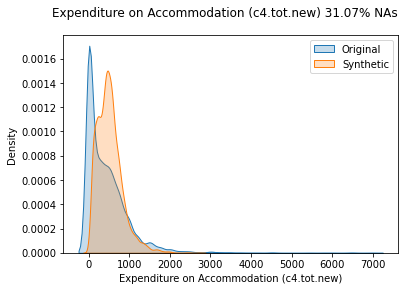

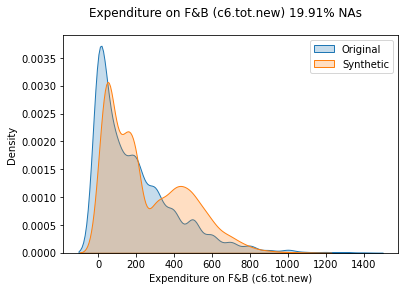

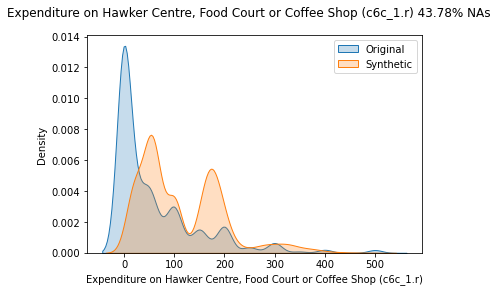

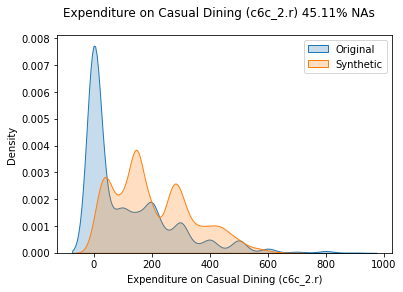

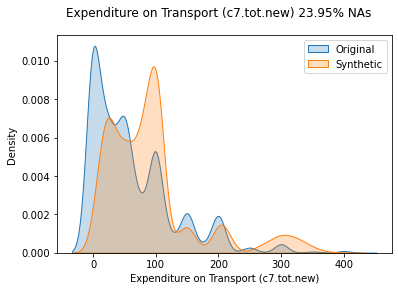

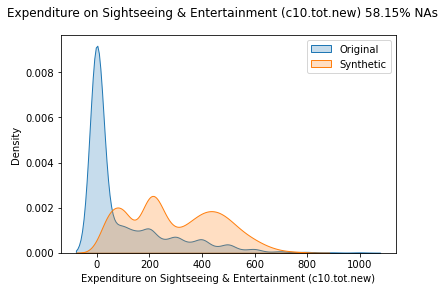

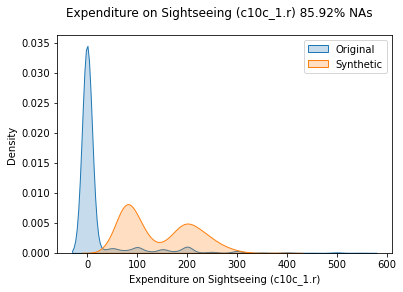

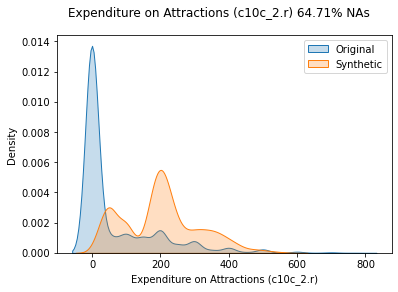

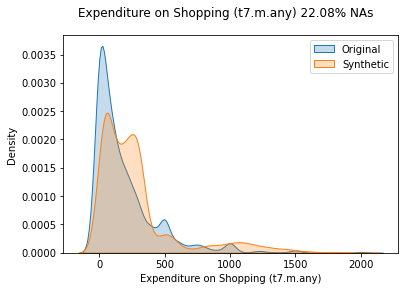

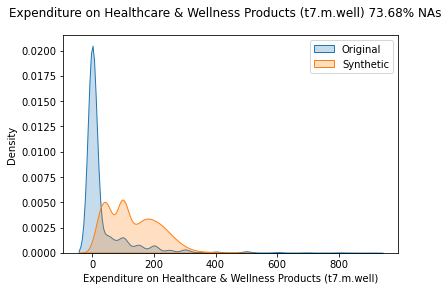

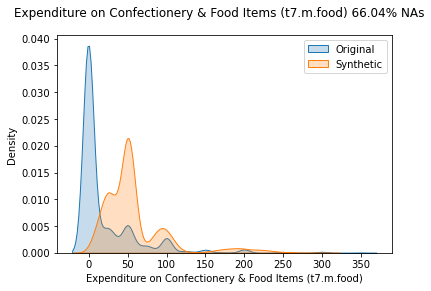

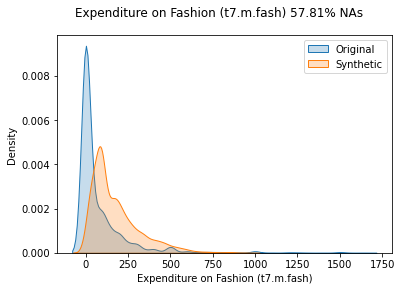

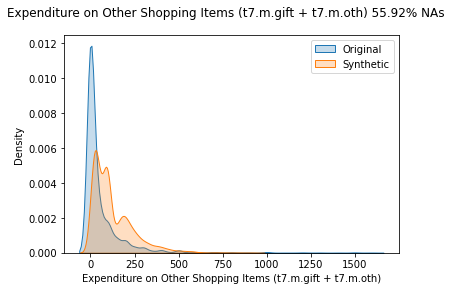

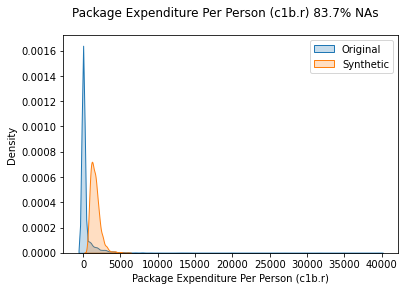

In [40]:
plots(np.exp(OVS1618_test)-2,ctgan_samples_cleaned,list_expnd)

## Plots of categorical benchmarks

In [36]:
def plot_bar(ovs, vgm1, cat_cols):
     for col in cat_cols:   
        width = 0.1
        xlab = np.asarray(ovs[col].value_counts().index)
        plt.bar(xlab,ovs[col].value_counts(), color='g', label='Original Data',width=width)
        plt.bar(xlab+width,vgm1[col].value_counts(), color='b', label='Synthetic Data',width=width)        
        plt.title(col)
        plt.legend();

        plt.show()

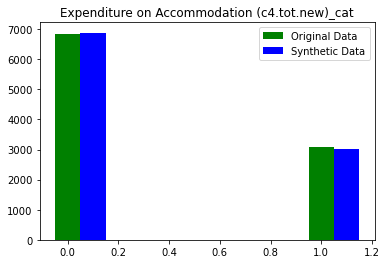

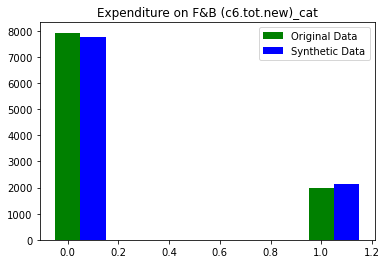

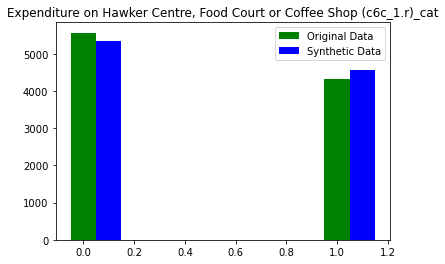

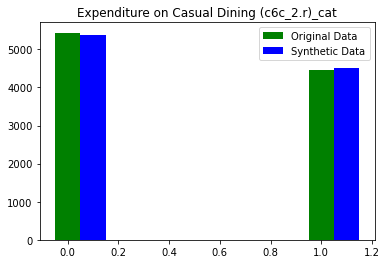

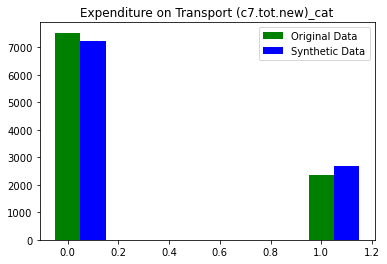

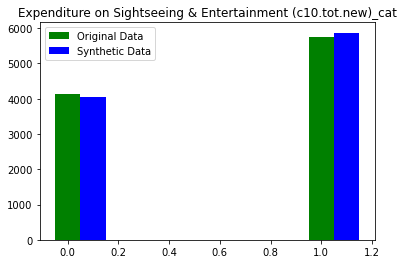

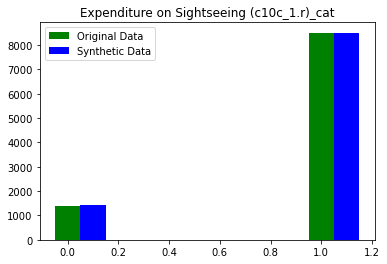

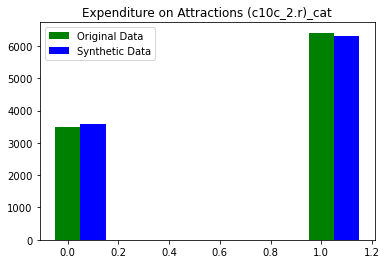

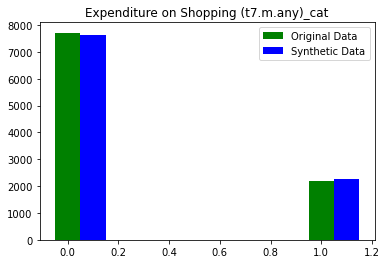

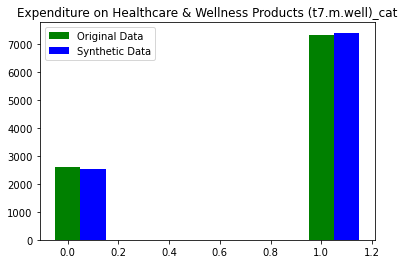

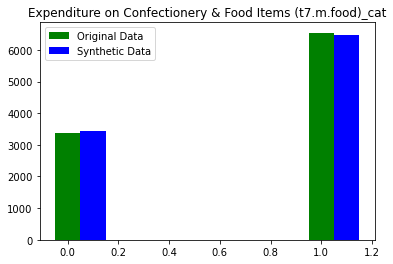

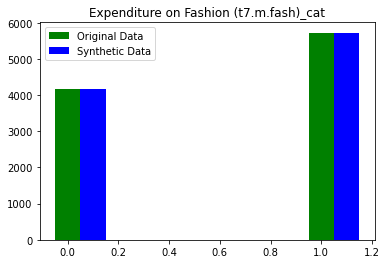

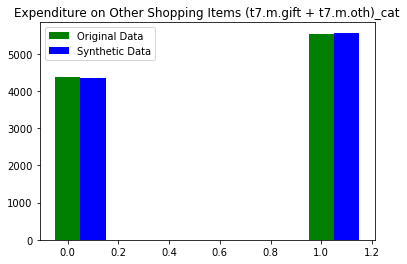

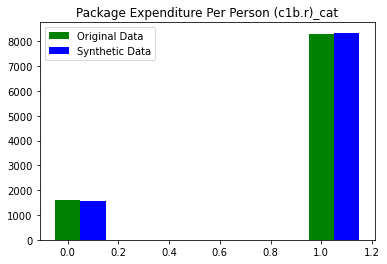

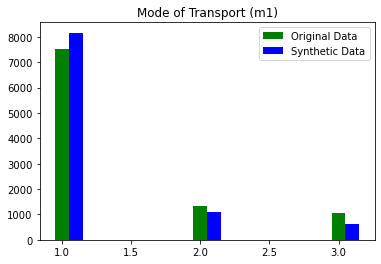

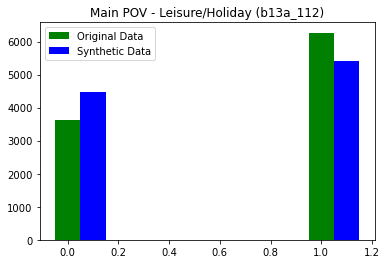

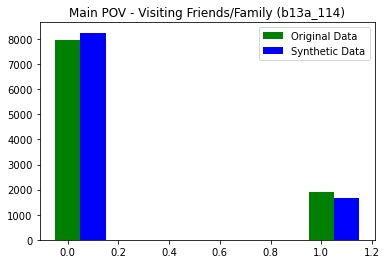

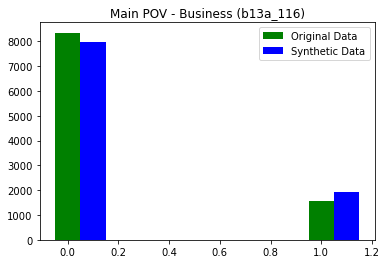

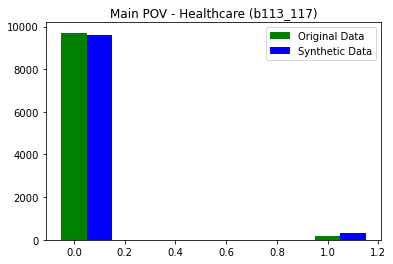

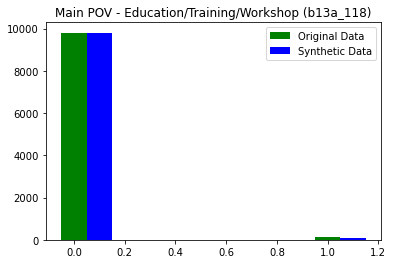

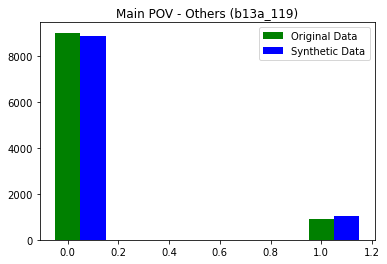

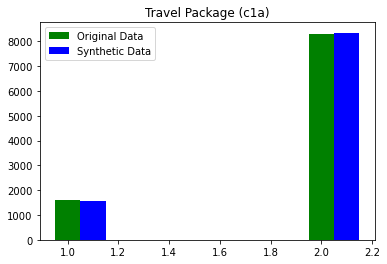

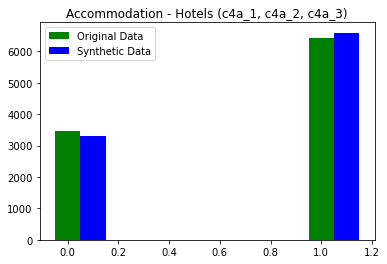

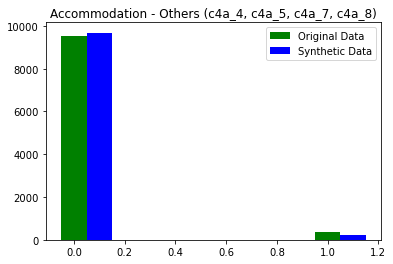

In [41]:
plot_bar(np.exp(OVS1618_test)-2,ctgan_samples_cleaned,cat_cols)